<a href="https://colab.research.google.com/github/Adyel/Digital-Image-Processing/blob/master/%5BCSE428%5D_Implementation_of_a_2D_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[DIP] Implementation of a 2D filter (Box Filter, Laplacian Filter)
**Task**: Implementation of a 2D filter (Box Filter, Laplacian Filter) on an 8-bit gray scale image.  
**Input**: Provided Images  
**Output**: Output Images after applying filters.  
**Platform**: Matlab, Python, or any other platform.

**Report**: (Should contain)  
*  Brief description on Correlation and Spatial filters.  
*  Input and output images.  
*  Effects of changing the size of the box filter.  
*  Discussion of the results obtained and why.  
*  Effects of applying the laplacian filter.  
*  Show the scaled output after applying laplacian filter.  
*  Discussion of which structures are extracted and why.  
*  SUBMIT printed copy.

**Code**: You CANNOT take help of built-in library functions while implementing the filters. Use of library functions are limited to Reading and Displaying figures.

**Deadline**: 30 November 2019

## What is Spatial Filters and Corelation?

### Spatial Filter
Spatial filtering term is the filtering operations that are performed directly on the pixels of an image. The process consists simply of moving the filter mask from point to point in an image. At each point (x,y) the response of the filter at that point is calculated using a predefined relationship. In other word, Spatial filtering is an image processing technique for changing the intensities of a pixel according to the intensities of the neighboring pixels. Using spatial filtering, the image is transformed based on a kernel / mask which has certain height and width (x,y), defining both the area and the weight of the pixels within the initial image that will replace the value of the image.  There can be linear and non liner spatial filtering. Mean, max, Box filter are example of Spatial Filtering.

### Corelation
Correlation is a basic operations that is used to extract
information from images. It in some sense the simplest operations that we can perform on an image, but it is extremely useful.
It has two key features, it is shift-invariant, and linear.
Shift-invariant means that we perform the same operation at every point in the image. Linear means that this operation is linear, meaning, we replace every 
pixel with a linear combination of its neighbors. In this process we move a filter mask on the image and compute the sum of products at each location.

## Import Libraries
**PIL** will be used to read the image file.  
**numpy** is necessary to manipulate array.  
**matplotlib** to print the image after transformation and to plot graph

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

##Open The Image
Open the file and transform it to 2d array.  
Also, pritining the Image to get an idea.

### First Sample Image

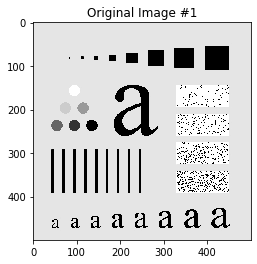

In [0]:
image1 = Image.open("Fig3.35(a).jpg")
image1_array = np.asarray(image1)

plt.imshow(image1, cmap = 'gray', vmax=255, vmin=0)
plt.title("Original Image #1")
plt.show()

### Second Sample Image

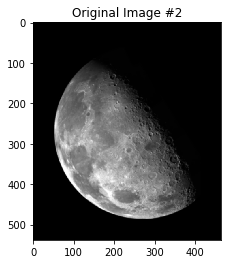

In [0]:
image2 = Image.open("Fig3.40(a).jpg")
image2_array = np.asarray(image2)

plt.imshow(image2, cmap = 'gray', vmax=255, vmin=0)
plt.title("Original Image #2")
plt.show()

## Helper Function

This will apply the kernel on each pixel

In [0]:
def squarify(M,val):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

In [0]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
        return new_image

In [0]:
def conv2d(_image, _kernel):
  m, n = _kernel.shape
  print("Before Padding: " + str(_image.shape))
  if(m == n):  
    padding = int(m / 2)
    print("padding: " + str(padding))
    padded_image = np.pad(_image, padding)
    sqr_padded_image = squarify(padded_image, 0)
    print("After Padding: " + str(sqr_padded_image.shape))
    y, x = _image.shape

    new_image = np.zeros_like(_image)

    for i in range(y):
      for j in range(x):
        new_image[i][j] = np.sum(sqr_padded_image[i:i + m, j: j + m] * _kernel)

    return new_image

In [0]:
def smoothing_img(_image, _sigma):
  array = np.full((_sigma, _sigma), 1)
  box_filter = array / _sigma**2
  return convolution2d(_image, box_filter)

## BOX Filterning

Box filtering is basically an average-of-surrounding-pixel kind of image filtering. We are going to apply smoothing liner filter on our Image#1. We are going to use kernel size 8 , 15, 25 and observe the results

In [0]:

smooth_image_8 = smoothing_img(image1_array, 7)
smooth_image_15 = smoothing_img(image1_array, 15)
smooth_image_25 = smoothing_img(image1_array, 25)

### Images after appling different kernel size

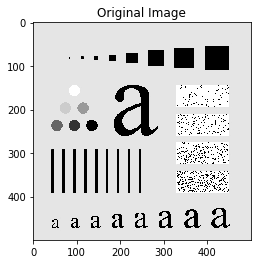

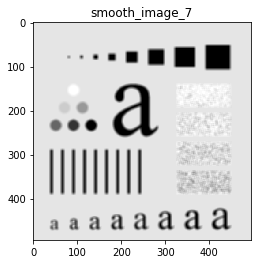

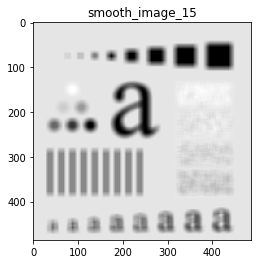

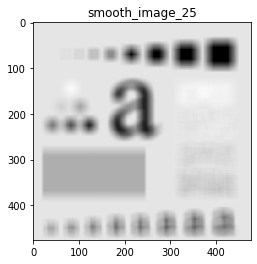

In [0]:
plt.imshow(image1, cmap = 'gray', vmax=255, vmin=0)
plt.title("Original Image")
plt.show()
plt.imshow(smooth_image_8, cmap='gray', vmax=255, vmin=0)
plt.title("smooth_image_7")
plt.show()
plt.imshow(smooth_image_15, cmap='gray', vmax=255, vmin=0)
plt.title("smooth_image_15")
plt.show()
plt.imshow(smooth_image_25, cmap='gray', vmax=255, vmin=0)
plt.title("smooth_image_25")
plt.show()

### Observation
We can see, as we increased our kernel size the image became more and more smoother. Box filter averages the neighbouring pixels. The bigger the kernel size, the more smoother the image is. Averaging the neighbouring samples gives us the output for current pixel. As a result, if we take huge sample of neighbours, the image become more and more blurry.

## Laplacian Filter
The Laplacian of an image highlights regions of rapid intensity change and is therefore often used for edge detection. The Laplacian is often applied to an image that has first been smoothed with something approximating a Gaussian smoothing filter. The operator takes a single graylevel image as input and produces another graylevel image as output.  

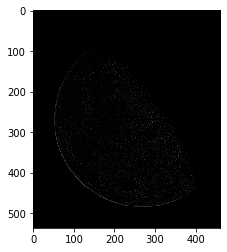

In [0]:
laplacian_filter = np.array(
    [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
)

lap = convolution2d(image2_array, laplacian_filter)

plt.imshow(lap, cmap='gray', vmax = 255, vmin = 0)
plt.show()


### Observation
From our example we can see it successfully detected the edges. So, we can conclude lapacian filter extracts the areas where higher variation of intensity is present.

### Sharping

Now if we add the edge with the original image, we will get more sharp image as it will add more details to the image.

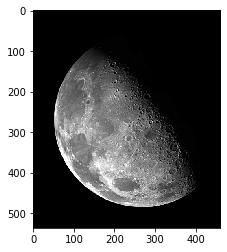

In [0]:
y,x = image2_array.shape
# remove padding
sharp = lap + image2_array[1:y-1, 1:x-1]

plt.imshow(sharp, cmap='gray', vmax = 255, vmin = 0)
plt.show()